In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
# import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

/tmp/ipykernel_2198497/3617350024.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
def read(path):
    testdata = []
    index = -1
    with open(path) as f:
        for line in f:
            if "current step is + " in line:
                index+=1
                step_str = line.split(" + ")[1]
                step = int(step_str)
                testdata.append([step])
            if "current img is + " in line:
                img_index_str = line.split(" + ")[1]
                img_index = int(img_index_str)
                testdata[index].append(img_index)
            if "img loss is + " in line:
                img_loss_str = line.split(" + ")[1]
                img_loss = float(img_loss_str)
                testdata[index].append(img_loss)
#             if "loss_depth_un is + " in line:
#                 depth_loss_str = line.split(" + ")[1]
#                 depth_loss = float(depth_loss_str)
#                 testdata[index].append(depth_loss)
            if "uncertainty sum is + " in line:
                uncertainty_str = line.split(" + ")[1]
                uncertainty = float(uncertainty_str)
                testdata[index].append(uncertainty)
            if "final loss is + " in line:
                final_loss_str = line.split(" + ")[1]
                final_loss = float(final_loss_str)
                testdata[index].append(final_loss)
            if "psnr is + " in line:
                psnr_str = line.split(" + ")[1]
                psnr = float(psnr_str)
                testdata[index].append(psnr)
#             if "ssim is + " in line:
#                 ssim_str = line.split(" + ")[1]
#                 ssim = float(ssim_str)
#                 testdata[index].append(ssim)
#             if "lpips is + " in line:
#                 lpips_str = line.split(" + ")[1]
#                 lpips = float(lpips_str)
#                 testdata[index].append(lpips)
#     testdata = pd.DataFrame(testdata,columns=['step','img_index','img_loss','uncertainty','depth_loss','final_loss','psnr','ssim','lpips'])
    testdata = pd.DataFrame(testdata,columns=['step','img_index','img_loss','uncertainty','final_loss','psnr'])
    return testdata

In [17]:
testdata = read('./logs/blender_uncertainty_lego_v1/testdata.txt')
testdata.describe()

,step,img_index,img_loss,uncertainty,final_loss,psnr
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,90000.000000,125.000000,1747.331148,672.774134,6.380517,26.549539
std,51392.480485,7.212724,2555.506245,359.216373,0.514614,4.086685
min,2000.000000,113.000000,198.329827,230.992462,5.448143,12.539907
25%,46000.000000,119.000000,467.034921,374.406036,5.928861,23.131222
50%,90000.000000,125.000000,927.951804,545.091064,6.303353,27.137157
75%,134000.000000,131.000000,2334.096830,935.650208,6.843845,30.118917
max,178000.000000,137.000000,26745.488579,2376.870850,7.778274,33.838531


In [18]:
def draw(x,y,xlabel=None,ylabel=None,title=None):
    fig = plt.figure(figsize=(10, 6), dpi=100)
    ax = plt.axes()
    ax.plot(x,y,"go")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

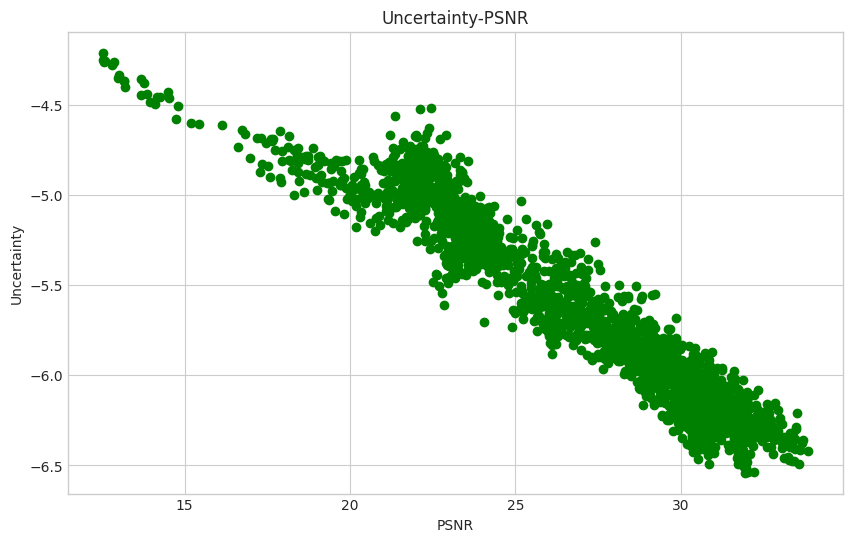

In [19]:
tt = testdata[:]
draw(tt["psnr"],np.log(tt["uncertainty"]/(400*400)),"PSNR","Uncertainty","Uncertainty-PSNR")